Inferences:

1. Since uniform distribution, we can impute NaN places of Age with MEAN/MEDIAN or Education level can be used.
2. Leave the Gender column as it is. No NaN, uniform.
3. Annual Income is Right-Skewed. But imputing NaN values will require more description and thinking.
4. Marital Status have similar number of counts. Thus, more information is required to fill its NaN values.
5. Similar number of counts in Number of Dependents. Thus, require more information for imputing NaN values
6. Nearly same number of counts in category of Education level. It will be also helpful for deciding the imputing. Also, no NaN in Education level.
7. Nearly same amount of category counts in Occupation. Will use other columns to decide what to impute.
8. Fill NaN values with median or according to Education Level in Health Score.
9. Keep the Location column as it is. No need to change anything. No NaN values.
10. Keep the Policy Type column as it is. No need to change anything. No NaN values.

11. Its remaining to decide what to impute for Previous claims. I will research more.

12. Simply fill NaN values of Vehicle Age with 10.0 (median).
13. Use Education level column for imputing the Credit Score NaN values.
14. Fill one NaN value of Insurance Duration with median (5).
15. We can drop 'Policy Start Date' column.
16. Fill NaN of Customer Feedback by looking at the other columns like Education Level etc.
17. No need to touch Smoking Status column.
18. No need to touch Exercise Frequency column.
19. No need to touch Property Type column.


**Explanation of this is given in the code step by step**
1. Fill NaN of Age with 41 in 1st iter, and its respective categorical models in 2nd iter.
2. Fill NaN of Annual Income with 23911.0 (median).
3. Fill NaN Marital Status NaN with 'Unknown'. (Since 18k NaN).
4. Fill -1 in NaN of Number of Dependents.
5. Fill NaN of Occupation with 'Unknown'.
6. Fill NaN of Health Score with median (25).
7. Fill NaN of Previous Claims with -1 (Unknown category since NaN is huge), drop in 2nd iter.
8. Fill NaN values of Vehicle Age with 10.0 (median).
9. Fill NaN values of Credit Score with 595.0 (Median).
10. Fill NaN values of Insurance Duration with 5 (median).
11. Make year column and Drop Policy Start Date Column.
12. Fill NaN values of Customer Feedback column with 'Unknown'

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_log_error

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Reading the data

In [131]:
data = pd.read_csv('/kaggle/input/playground-series-s4e12/train.csv', index_col='id')

In [132]:
data.head()

Age  Gender  Annual Income Marital Status  Number of Dependents  \
id                                                                     
0   19.0  Female        10049.0        Married                   1.0   
1   39.0  Female        31678.0       Divorced                   3.0   
2   23.0    Male        25602.0       Divorced                   3.0   
3   21.0    Male       141855.0        Married                   2.0   
4   21.0    Male        39651.0         Single                   1.0   

   Education Level     Occupation  Health Score  Location    Policy Type  \
id                                                                         
0       Bachelor's  Self-Employed     22.598761     Urban        Premium   
1         Master's            NaN     15.569731     Rural  Comprehensive   
2      High School  Self-Employed     47.177549  Suburban        Premium   
3       Bachelor's            NaN     10.938144     Rural          Basic   
4       Bachelor's  Self-Employed     20.376094     Rural        Premium   

    Previous Claims  Vehicle Age  Credit Score  Insurance Duration  \
id                                                                   
0               2.0         17.0         372.0                 5.0   
1               1.0         12.0         694.0                 2.0   
2               1.0         14.0           NaN                 3.0   
3               1.0          0.0         367.0                 1.0   
4               0.0          8.0         598.0                 4.0   

             Policy Start Date Customer Feedback Smoking Status  \
id                                                                
0   2023-12-23 15:21:39.134960              Poor             No   
1   2023-06-12 15:21:39.111551           Average            Yes   
2   2023-09-30 15:21:39.221386              Good            Yes   
3   2024-06-12 15:21:39.226954              Poor            Yes   
4   2021-12-01 15:21:39.252145              Poor            Yes   

   Exercise Frequency Property Type  Premium Amount  
id                                                   
0              Weekly         House          2869.0  
1             Monthly         House          1483.0  
2              Weekly         House           567.0  
3               Daily     Apartment           765.0  
4              Weekly         House          2022.0

In [4]:
data.describe()

Age  Annual Income  Number of Dependents  Health Score  \
count  1.181295e+06   1.155051e+06          1.090328e+06  1.125924e+06   
mean   4.114556e+01   3.274522e+04          2.009934e+00  2.561391e+01   
std    1.353995e+01   3.217951e+04          1.417338e+00  1.220346e+01   
min    1.800000e+01   1.000000e+00          0.000000e+00  2.012237e+00   
25%    3.000000e+01   8.001000e+03          1.000000e+00  1.591896e+01   
50%    4.100000e+01   2.391100e+04          2.000000e+00  2.457865e+01   
75%    5.300000e+01   4.463400e+04          3.000000e+00  3.452721e+01   
max    6.400000e+01   1.499970e+05          4.000000e+00  5.897591e+01   

       Previous Claims   Vehicle Age  Credit Score  Insurance Duration  \
count    835971.000000  1.199994e+06  1.062118e+06        1.199999e+06   
mean          1.002689  9.569889e+00  5.929244e+02        5.018219e+00   
std           0.982840  5.776189e+00  1.499819e+02        2.594331e+00   
min           0.000000  0.000000e+00  3.000000e+02        1.000000e+00   
25%           0.000000  5.000000e+00  4.680000e+02        3.000000e+00   
50%           1.000000  1.000000e+01  5.950000e+02        5.000000e+00   
75%           2.000000  1.500000e+01  7.210000e+02        7.000000e+00   
max           9.000000  1.900000e+01  8.490000e+02        9.000000e+00   

       Premium Amount  
count    1.200000e+06  
mean     1.102545e+03  
std      8.649989e+02  
min      2.000000e+01  
25%      5.140000e+02  
50%      8.720000e+02  
75%      1.509000e+03  
max      4.999000e+03

In [5]:
print("NaN in % column wise :")
for col in data.columns:
    print(f"{col} ====> {round((data[col].isna().sum()/len(data))*100, 5)} %")

NaN in % column wise :
Age ====> 1.55875 %
Gender ====> 0.0 %
Annual Income ====> 3.74575 %
Marital Status ====> 1.54408 %
Number of Dependents ====> 9.13933 %
Education Level ====> 0.0 %
Occupation ====> 29.83958 %
Health Score ====> 6.173 %
Location ====> 0.0 %
Policy Type ====> 0.0 %
Previous Claims ====> 30.33575 %
Vehicle Age ====> 0.0005 %
Credit Score ====> 11.49017 %
Insurance Duration ====> 8e-05 %
Policy Start Date ====> 0.0 %
Customer Feedback ====> 6.48533 %
Smoking Status ====> 0.0 %
Exercise Frequency ====> 0.0 %
Property Type ====> 0.0 %
Premium Amount ====> 0.0 %


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1200000 entries, 0 to 1199999
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Age                   1181295 non-null  float64
 1   Gender                1200000 non-null  object 
 2   Annual Income         1155051 non-null  float64
 3   Marital Status        1181471 non-null  object 
 4   Number of Dependents  1090328 non-null  float64
 5   Education Level       1200000 non-null  object 
 6   Occupation            841925 non-null   object 
 7   Health Score          1125924 non-null  float64
 8   Location              1200000 non-null  object 
 9   Policy Type           1200000 non-null  object 
 10  Previous Claims       835971 non-null   float64
 11  Vehicle Age           1199994 non-null  float64
 12  Credit Score          1062118 non-null  float64
 13  Insurance Duration    1199999 non-null  float64
 14  Policy Start Date     1200000 non-null 

In [7]:
len(data)

1200000

# Exploratory Data Analysis - Univariate

## Age Column

In [8]:
data['Age'].value_counts(ascending=True)

Age
23.0    23225
41.0    24117
27.0    24212
25.0    24221
63.0    24283
28.0    24455
18.0    24488
52.0    24592
60.0    24593
42.0    24626
19.0    24641
29.0    24673
30.0    24683
24.0    24690
26.0    24805
48.0    24834
40.0    24877
50.0    24943
21.0    24987
20.0    25055
45.0    25101
49.0    25107
55.0    25132
51.0    25162
37.0    25163
59.0    25173
22.0    25309
35.0    25323
36.0    25340
38.0    25346
54.0    25370
32.0    25435
56.0    25450
31.0    25500
58.0    25544
34.0    25615
44.0    25642
47.0    25709
33.0    25728
46.0    25756
62.0    25849
43.0    25966
57.0    25971
64.0    25990
39.0    26042
61.0    26218
53.0    26354
Name: count, dtype: int64

In [9]:
min(data['Age']), max(data['Age'])

(18.0, 64.0)

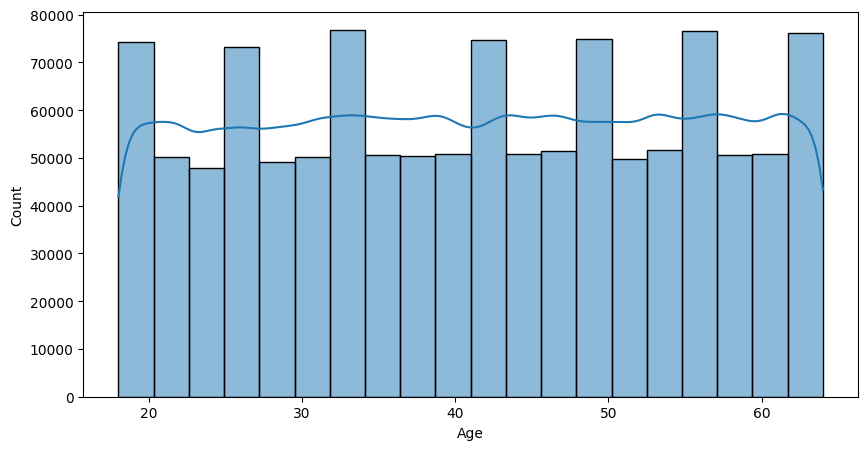

In [10]:
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='Age', kde=True, bins=20);

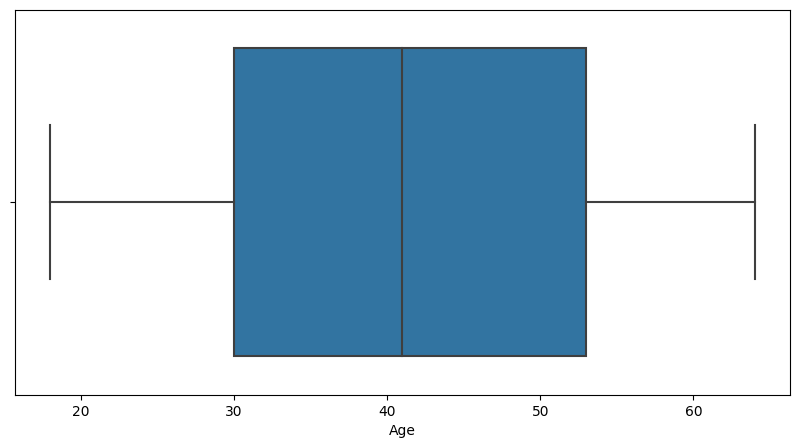

In [11]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='Age');

In [12]:
# Fill NaN values of Age column with Mean of age
np.median(data['Age'].dropna())

41.0

## Gender Column

In [13]:
data['Gender'].value_counts()

Gender
Male      602571
Female    597429
Name: count, dtype: int64

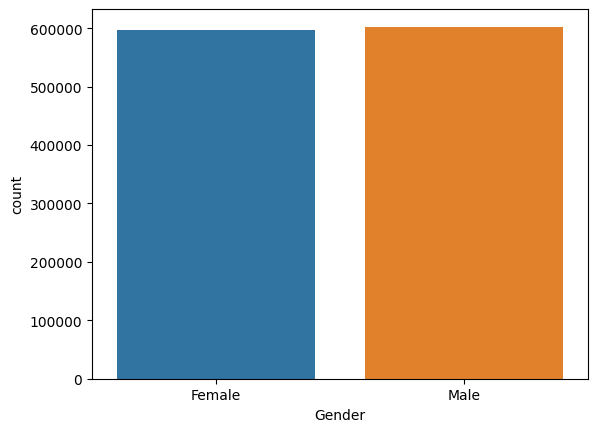

In [14]:
sns.countplot(data=data, x='Gender');

In [15]:
# Nearly same amount of females and males.

In [16]:
data['Gender'].isna().sum()

0

In [17]:
# No NaN values in Gender.

## Annual Income column

In [18]:
max(data['Annual Income'])

149997.0

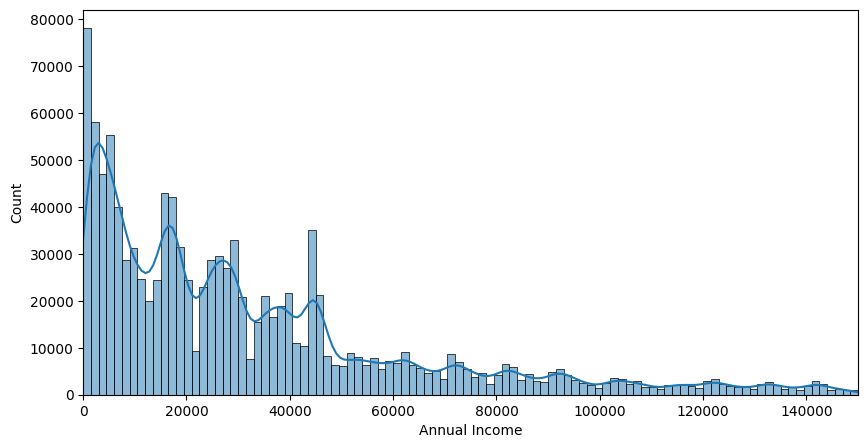

In [19]:
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='Annual Income', kde=True, bins=100)
plt.xlim(0, 150000);

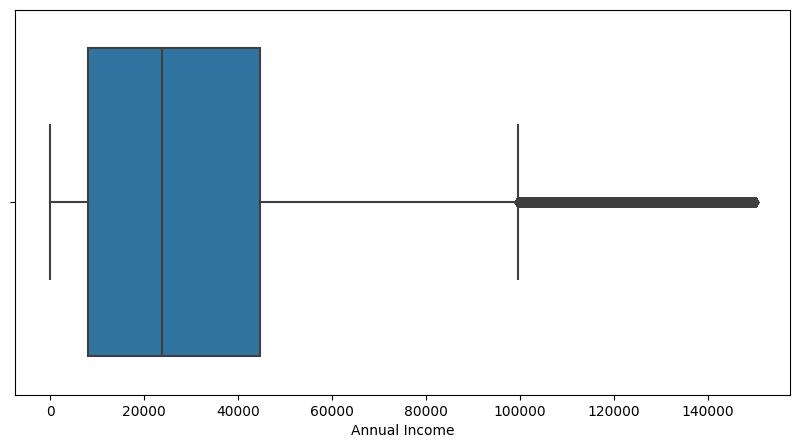

In [20]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='Annual Income');

In [21]:
np.median(data['Annual Income'].dropna())

23911.0

## Marital Status column

In [22]:
data['Marital Status'].value_counts()

Marital Status
Single      395391
Married     394316
Divorced    391764
Name: count, dtype: int64

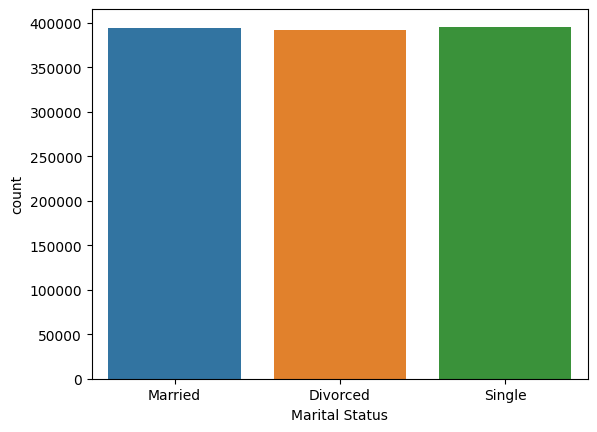

In [23]:
sns.countplot(data=data, x='Marital Status');

In [24]:
# All values have nearly same/similar count.

In [25]:
data['Marital Status'].isna().sum()

18529

## Number of Dependents column

In [26]:
data['Number of Dependents'].value_counts()

Number of Dependents
3.0    221475
4.0    220340
0.0    218124
2.0    215313
1.0    215076
Name: count, dtype: int64

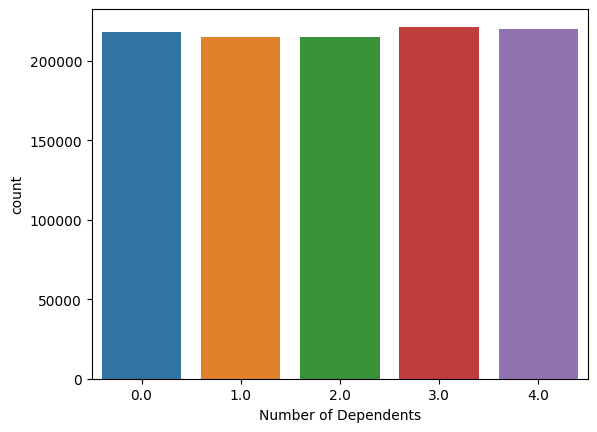

In [27]:
sns.countplot(data=data, x='Number of Dependents');

In [28]:
data['Number of Dependents'].isna().sum()

109672

In [29]:
# Similar number of counts in Number of Dependents. 
# Thus, require more information for imputing NaN values

## Education Level column

In [30]:
data['Education Level'].value_counts()

Education Level
Master's       303818
PhD            303507
Bachelor's     303234
High School    289441
Name: count, dtype: int64

<Axes: xlabel='Education Level', ylabel='count'>

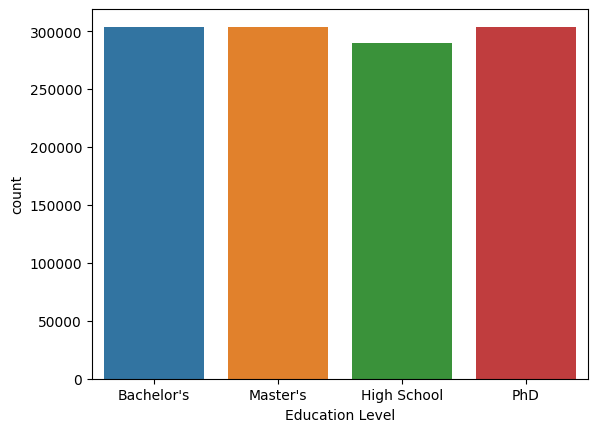

In [31]:
sns.countplot(data=data, x='Education Level')

In [32]:
data['Education Level'].isna().sum()

0

In [33]:
# Nearly same number of counts in category of Education level.
# It will be also helpful for deciding the imputing

## Occupation column

In [34]:
data['Occupation'].value_counts()

Occupation
Employed         282750
Self-Employed    282645
Unemployed       276530
Name: count, dtype: int64

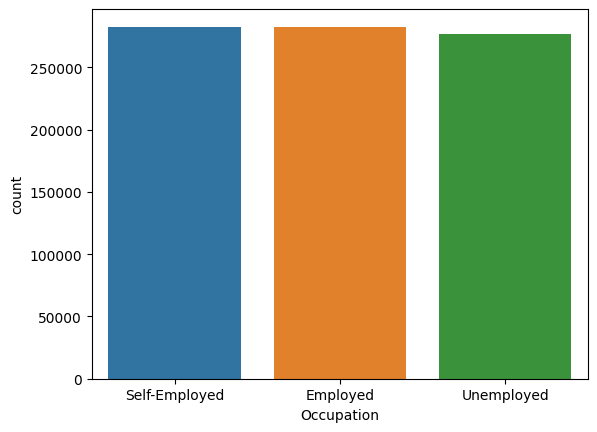

In [35]:
sns.countplot(data=data, x='Occupation');

In [36]:
data['Occupation'].isna().sum()

358075

In [37]:
# Nearly same amount of category counts in Occupation. Will use other columns to decide what to impute.

In [38]:
# # To try : 
# 1. Age imputing with Education Level
# 2. Annual Income imputing with Education level
# 3. Marital Status imputing with Education level
# 4. Occupation column imuting with Education level

## Health Score column

In [39]:
min(data['Health Score']), max(data['Health Score'])

(2.0122371818911766, 58.97591405405534)

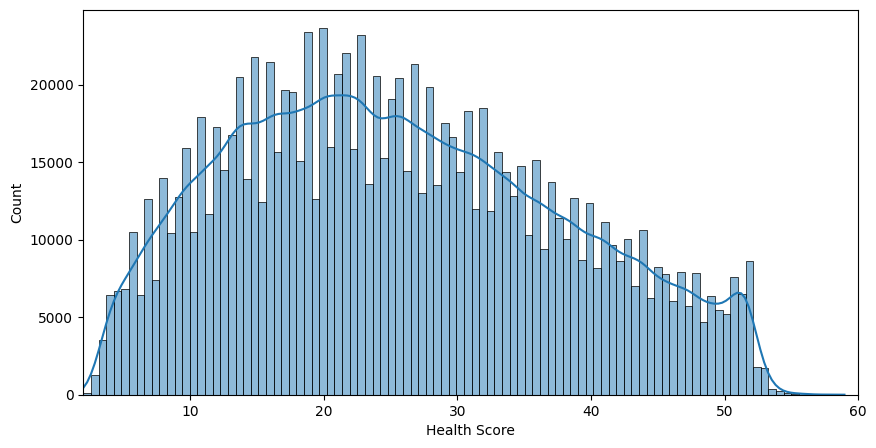

In [40]:
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='Health Score', bins=100, kde=True)
plt.xlim(2, 60);

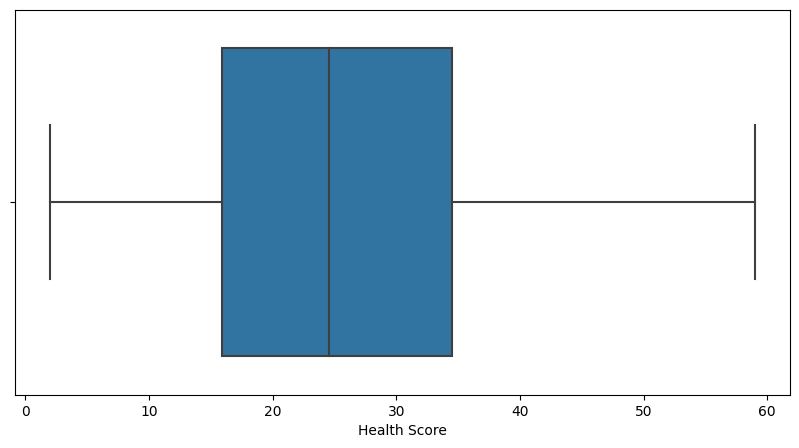

In [41]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='Health Score');

In [42]:
data['Health Score'].isna().sum()

74076

In [43]:
np.median(data['Health Score'].dropna()), np.mean(data['Health Score'].dropna())

(24.57864816412784, 25.613907692519255)

In [44]:
# Fill NaN values with median or according to Education Level

## Location column

In [45]:
data['Location'].value_counts()

Location
Suburban    401542
Rural       400947
Urban       397511
Name: count, dtype: int64

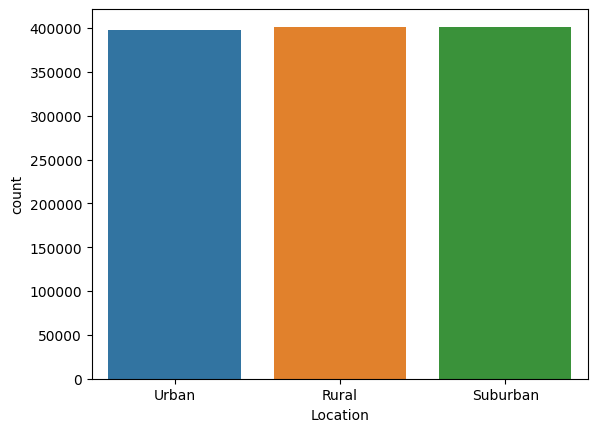

In [46]:
sns.countplot(data=data, x='Location');

In [47]:
data['Location'].isna().sum()

0

## Policy Type column

In [48]:
data['Policy Type'].value_counts()

Policy Type
Premium          401846
Comprehensive    399600
Basic            398554
Name: count, dtype: int64

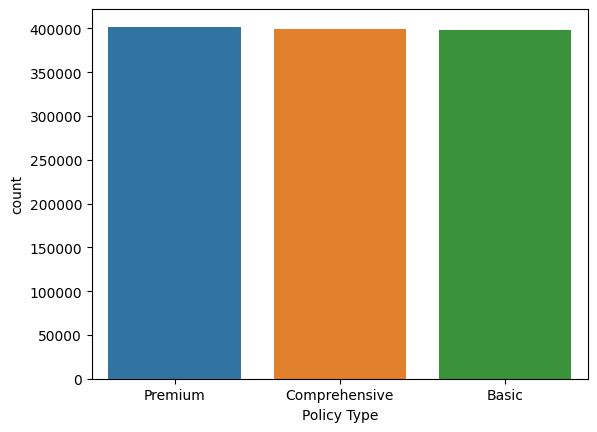

In [49]:
sns.countplot(data=data, x='Policy Type');

In [50]:
data['Policy Type'].isna().sum()

0

## Previous Claims column

In [51]:
data['Previous Claims'].value_counts()

Previous Claims
0.0    305433
1.0    300811
2.0    167661
3.0     49011
4.0     10668
5.0      2018
6.0       302
7.0        58
8.0         8
9.0         1
Name: count, dtype: int64

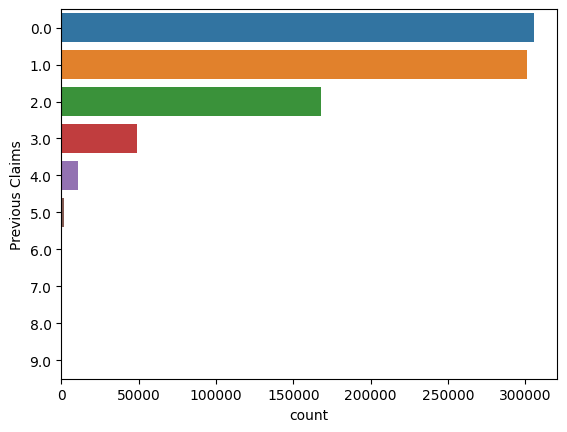

In [52]:
sns.countplot(data=data, y='Previous Claims');

In [53]:
data['Previous Claims'].isna().sum()

364029

In [54]:
# Its remaining to decide what to impute for Previous claims. I will research more.
# I will use Education Level column

## Vehicle Age column

In [55]:
data['Vehicle Age'].value_counts(ascending=True)

Vehicle Age
1.0     57365
6.0     58084
4.0     58148
8.0     58298
13.0    58684
3.0     59058
5.0     59499
7.0     59700
2.0     59741
9.0     59833
16.0    60314
19.0    60495
12.0    60718
14.0    60815
15.0    60817
10.0    61351
18.0    61399
11.0    61483
0.0     61615
17.0    62577
Name: count, dtype: int64

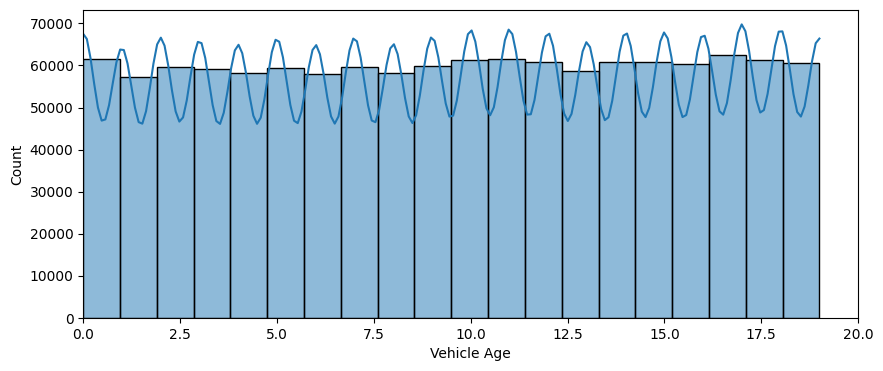

In [56]:
plt.figure(figsize=(10, 4))
sns.histplot(data=data, x='Vehicle Age', bins=20, kde=True)
plt.xlim(0, 20);

In [57]:
data['Vehicle Age'].isna().sum()

6

In [58]:
np.median(data['Vehicle Age'].dropna())

10.0

In [59]:
# Simply fill NaN values of Vehicle Age with 10.0 (median).

## Credit Score column

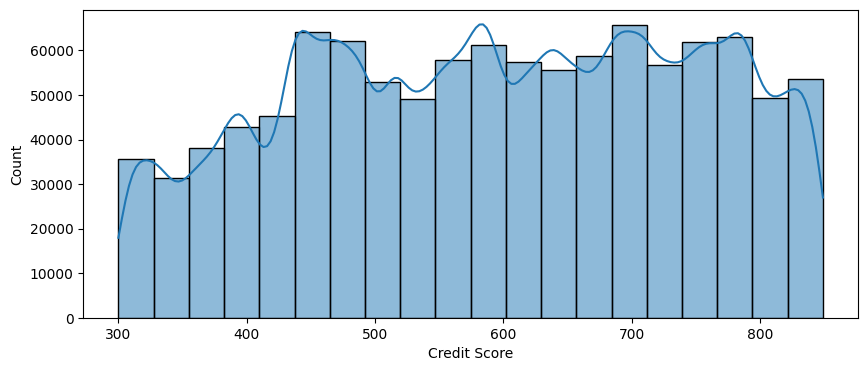

In [60]:
plt.figure(figsize=(10, 4))
sns.histplot(data=data, x='Credit Score', kde=True, bins=20);

In [61]:
data['Credit Score'].isna().sum()

137882

In [62]:
# Use Education level column for imputing the Credit Score NaN values.

## Insurance Duration column

In [63]:
data['Insurance Duration'].value_counts()

Insurance Duration
9.0    137781
1.0    135072
8.0    133800
7.0    133592
5.0    132253
4.0    132182
6.0    132141
3.0    132018
2.0    131160
Name: count, dtype: int64

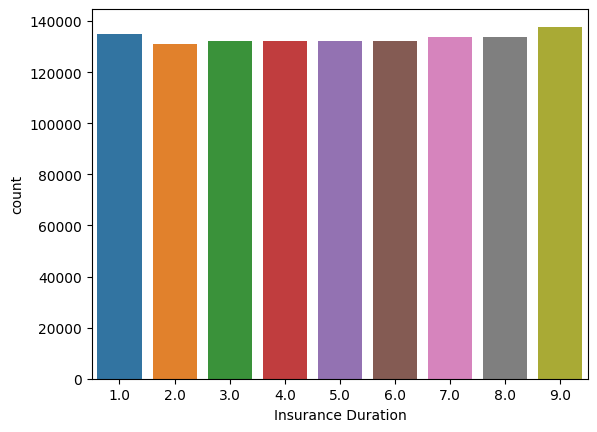

In [64]:
sns.countplot(data=data, x='Insurance Duration');

In [65]:
data['Insurance Duration'].isna().sum()

1

In [66]:
# Fill one NaN value of Insurance Duration with median (5).

## Policy Start Date column

In [67]:
data['Policy Start Date'].value_counts()

Policy Start Date
2020-02-08 15:21:39.134960    142
2023-08-13 15:21:39.155231    137
2022-02-02 15:21:39.134960    137
2022-08-30 15:21:39.134960    134
2023-11-02 15:21:39.134960    118
                             ... 
2021-06-07 15:21:39.104139      1
2024-07-19 15:21:39.233998      1
2019-12-14 15:21:39.110557      1
2020-07-23 15:21:39.217387      1
2020-10-19 15:21:39.118178      1
Name: count, Length: 167381, dtype: int64

In [68]:
data['Policy Start Date'] = pd.to_datetime(data['Policy Start Date'])
data['Year'] = data['Policy Start Date'].dt.year
data.head()

Age  Gender  Annual Income Marital Status  Number of Dependents  \
id                                                                     
0   19.0  Female        10049.0        Married                   1.0   
1   39.0  Female        31678.0       Divorced                   3.0   
2   23.0    Male        25602.0       Divorced                   3.0   
3   21.0    Male       141855.0        Married                   2.0   
4   21.0    Male        39651.0         Single                   1.0   

   Education Level     Occupation  Health Score  Location    Policy Type  ...  \
id                                                                        ...   
0       Bachelor's  Self-Employed     22.598761     Urban        Premium  ...   
1         Master's            NaN     15.569731     Rural  Comprehensive  ...   
2      High School  Self-Employed     47.177549  Suburban        Premium  ...   
3       Bachelor's            NaN     10.938144     Rural          Basic  ...   
4       Bachelor's  Self-Employed     20.376094     Rural        Premium  ...   

    Vehicle Age  Credit Score  Insurance Duration          Policy Start Date  \
id                                                                             
0          17.0         372.0                 5.0 2023-12-23 15:21:39.134960   
1          12.0         694.0                 2.0 2023-06-12 15:21:39.111551   
2          14.0           NaN                 3.0 2023-09-30 15:21:39.221386   
3           0.0         367.0                 1.0 2024-06-12 15:21:39.226954   
4           8.0         598.0                 4.0 2021-12-01 15:21:39.252145   

   Customer Feedback Smoking Status Exercise Frequency Property Type  \
id                                                                     
0               Poor             No             Weekly         House   
1            Average            Yes            Monthly         House   
2               Good            Yes             Weekly         House   
3               Poor            Yes              Daily     Apartment   
4               Poor            Yes             Weekly         House   

   Premium Amount  Year  
id                       
0          2869.0  2023  
1          1483.0  2023  
2           567.0  2023  
3           765.0  2024  
4          2022.0  2021  

[5 rows x 21 columns]

In [69]:
data['Year'].value_counts()

Year
2022    245671
2021    244918
2020    242087
2023    239067
2024    143968
2019     84289
Name: count, dtype: int64

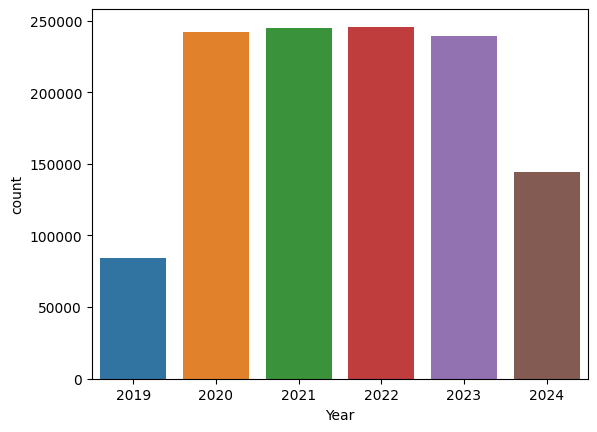

In [70]:
sns.countplot(data=data, x='Year');

In [71]:
data['Policy Start Date'].isna().sum()

0

In [72]:
data['Year'].isna().sum()

0

In [73]:
# We can drop 'Policy Start Date' column

## Customer Feedback column

In [74]:
data['Customer Feedback'].value_counts()

Customer Feedback
Average    377905
Poor       375518
Good       368753
Name: count, dtype: int64

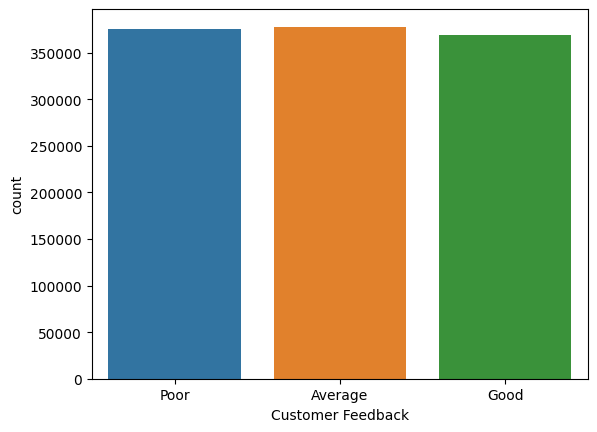

In [75]:
sns.countplot(data=data, x='Customer Feedback');

In [76]:
data['Customer Feedback'].isna().sum()

77824

In [77]:
## Fill NaN of Customer Feedback by looking at the other columns like Education Level etc.

## Smoking Status column

In [78]:
data['Smoking Status'].value_counts()

Smoking Status
Yes    601873
No     598127
Name: count, dtype: int64

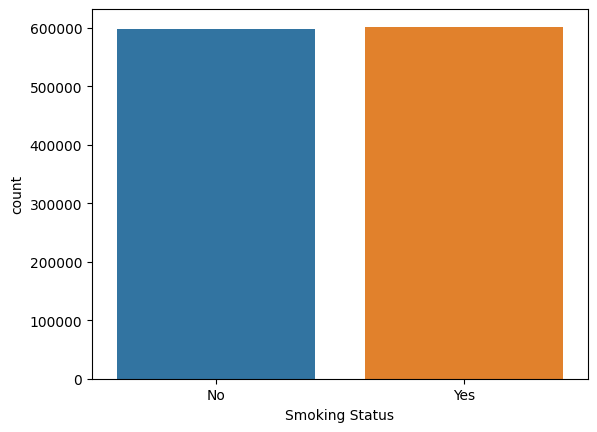

In [79]:
sns.countplot(data=data, x='Smoking Status');

In [80]:
data['Smoking Status'].isna().sum()

0

## Exercise Frequency column

In [81]:
data['Exercise Frequency'].value_counts()

Exercise Frequency
Weekly     306179
Monthly    299830
Rarely     299420
Daily      294571
Name: count, dtype: int64

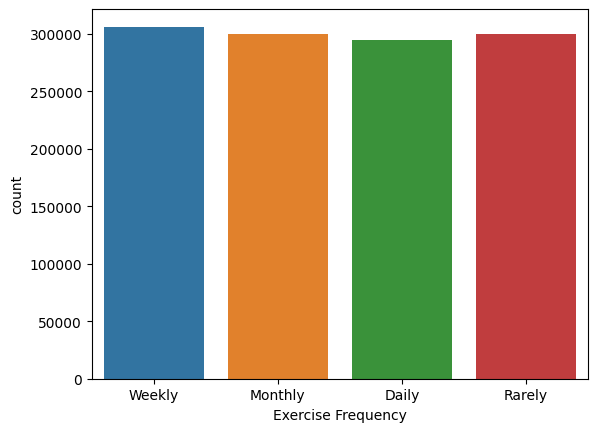

In [82]:
sns.countplot(data=data, x='Exercise Frequency');

In [83]:
data['Exercise Frequency'].isna().sum()

0

## Property Type column

In [84]:
data['Property Type'].value_counts()

Property Type
House        400349
Apartment    399978
Condo        399673
Name: count, dtype: int64

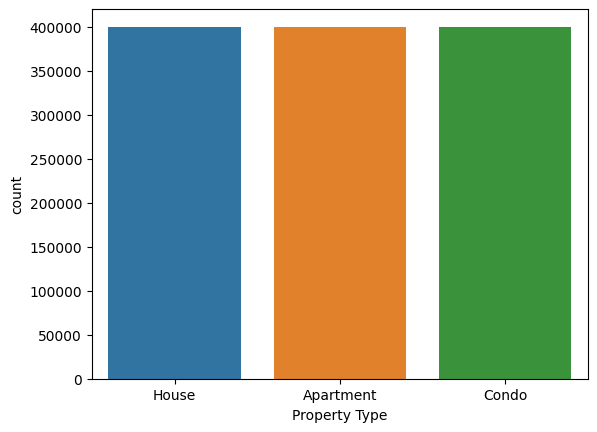

In [85]:
sns.countplot(data=data, x='Property Type');

In [86]:
data['Property Type'].isna().sum()

0

# Premium Amount - The OG Target Column

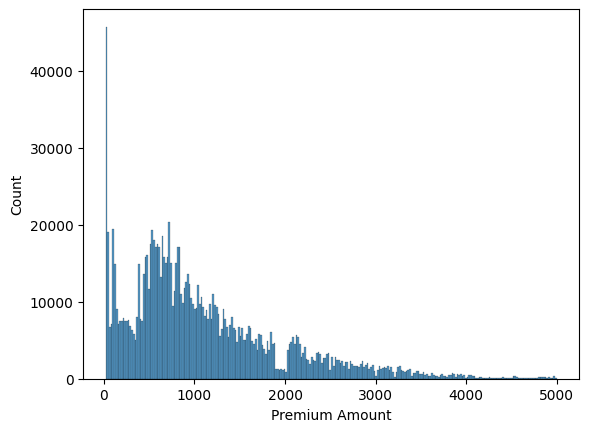

In [87]:
sns.histplot(data=data, x='Premium Amount');

# Exploratory Data Analysis - Bivariate

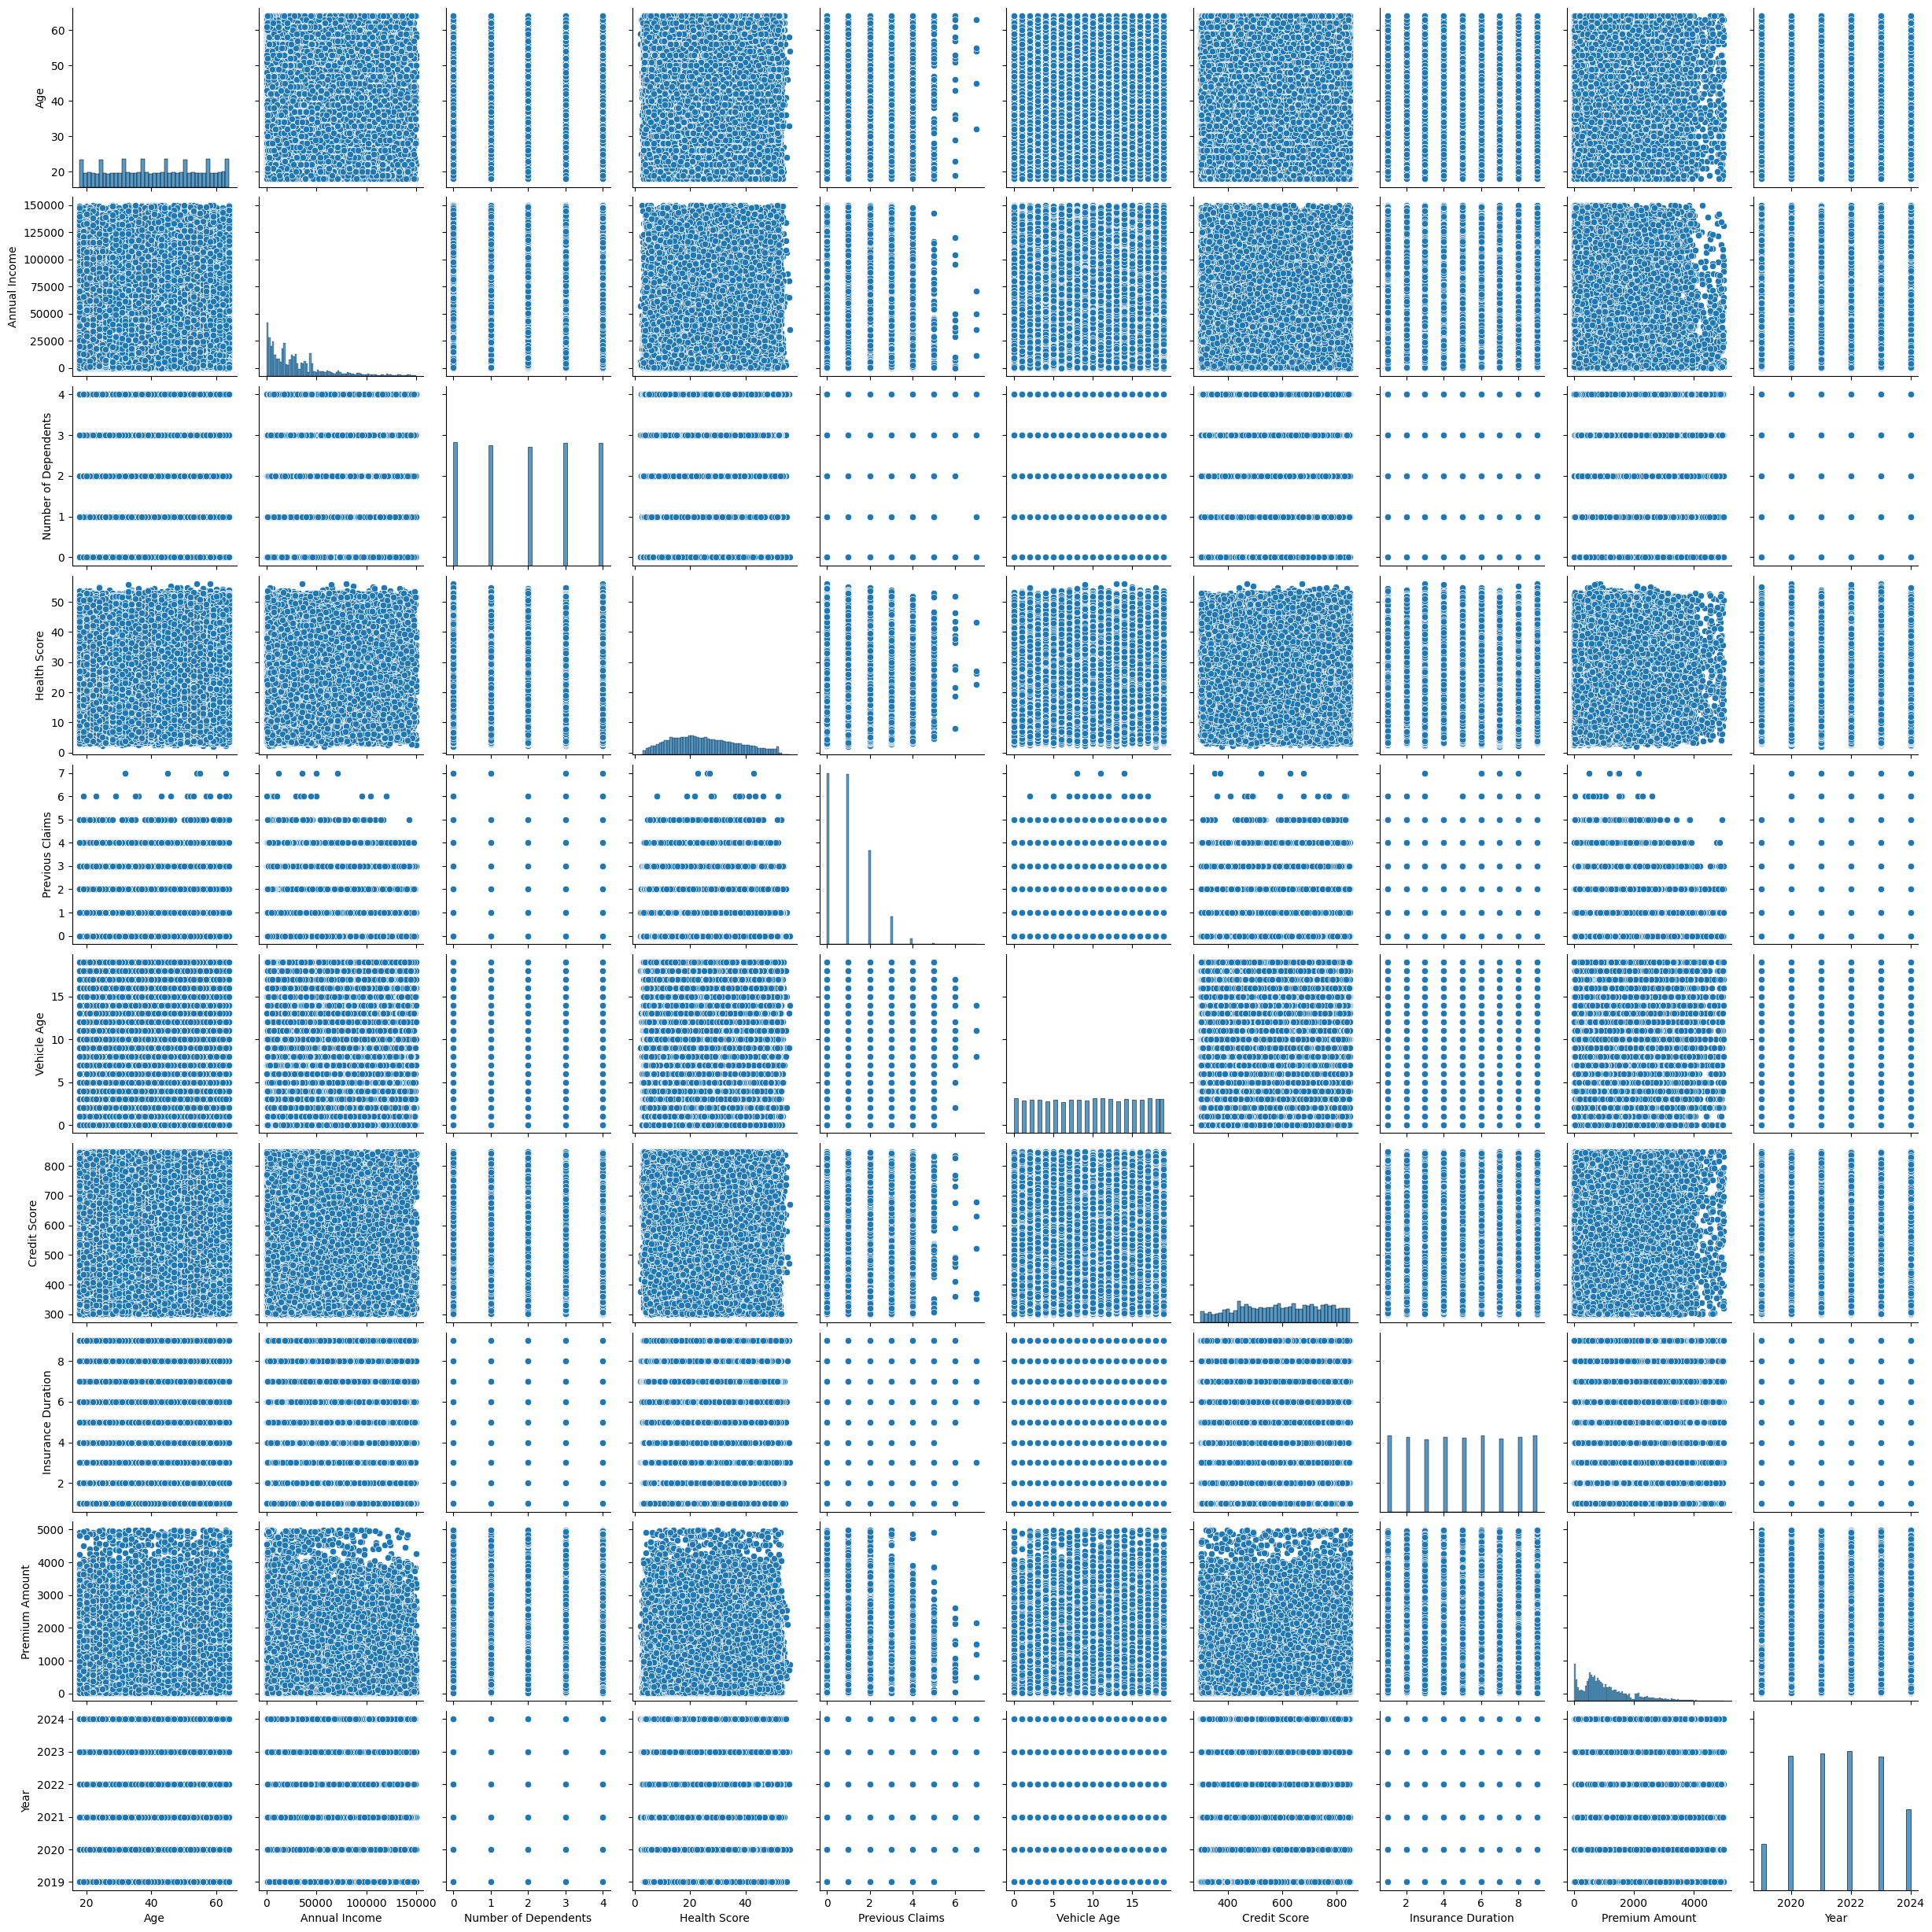

In [88]:
sns.pairplot(data.sample(frac=0.05, random_state=47))

In [89]:
data.columns

Index(['Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount', 'Year'],
      dtype='object')

## Age vs Educational Level, Premium Amount

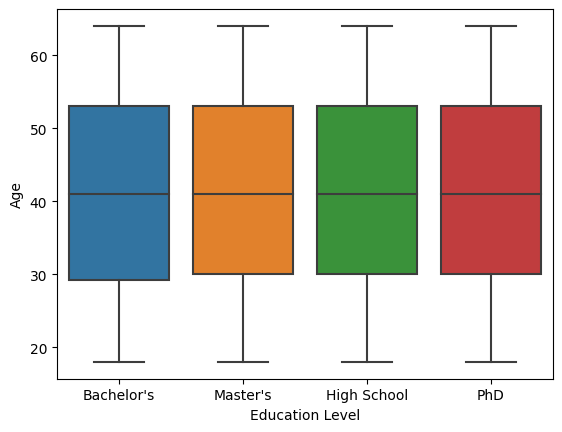

In [90]:
# Age vs Education Level
sns.boxplot(data=data, x='Education Level', y='Age');

In [91]:
data[data['Education Level'] == "Bachelor's"]['Age'].median()

41.0

In [92]:
data[data['Education Level'] == "Master's"]['Age'].median()

41.0

In [93]:
data[data['Education Level'] == "High School"]['Age'].median()

41.0

In [94]:
data[data['Education Level'] == "PhD"]['Age'].median()

41.0

In [95]:
data[data['Education Level'] == "Bachelor's"]['Age'].mode()[0]

64.0

In [96]:
data[data['Education Level'] == "Master's"]['Age'].mode()[0]

53.0

In [97]:
data[data['Education Level'] == "High School"]['Age'].mode()[0]

61.0

In [98]:
data[data['Education Level'] == "PhD"]['Age'].mode()[0]

46.0

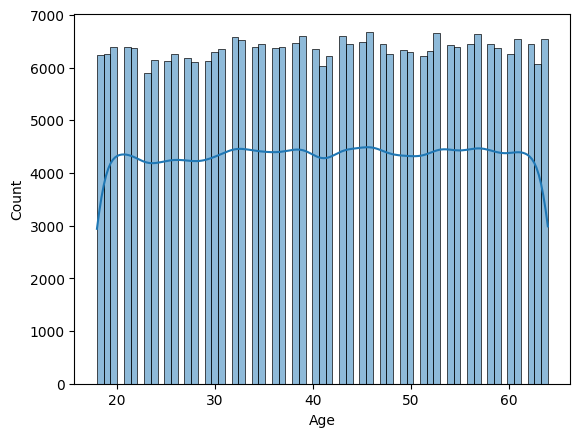

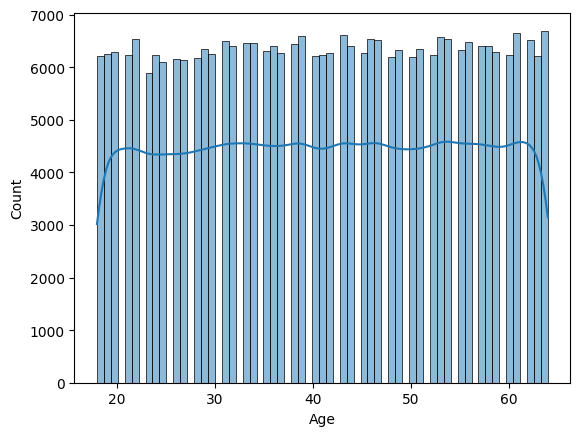

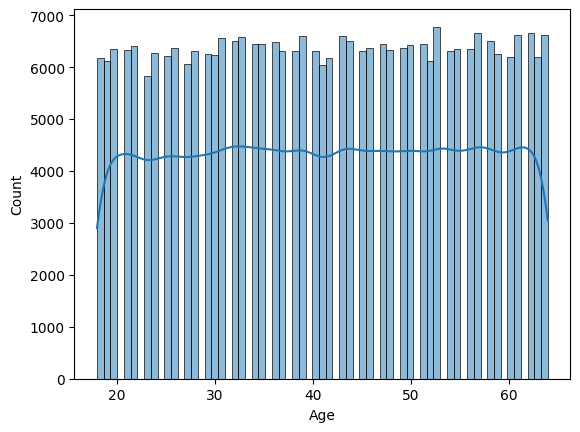

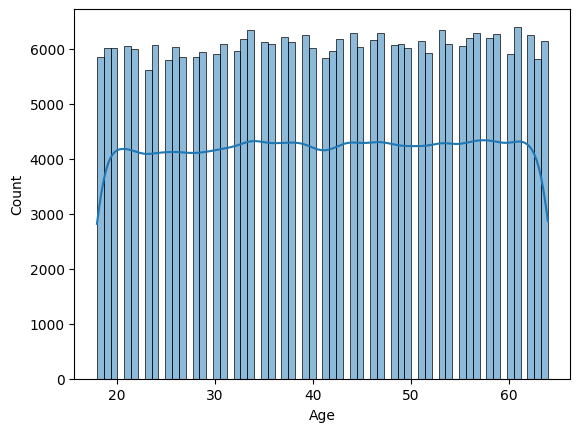

In [99]:
sns.histplot(data[data['Education Level'] == "PhD"]['Age'], kde=True)
plt.show()
sns.histplot(data[data['Education Level'] == "Bachelor's"]['Age'], kde=True)
plt.show()
sns.histplot(data[data['Education Level'] == "Master's"]['Age'], kde=True)
plt.show()
sns.histplot(data[data['Education Level'] == "High School"]['Age'], kde=True)
plt.show()

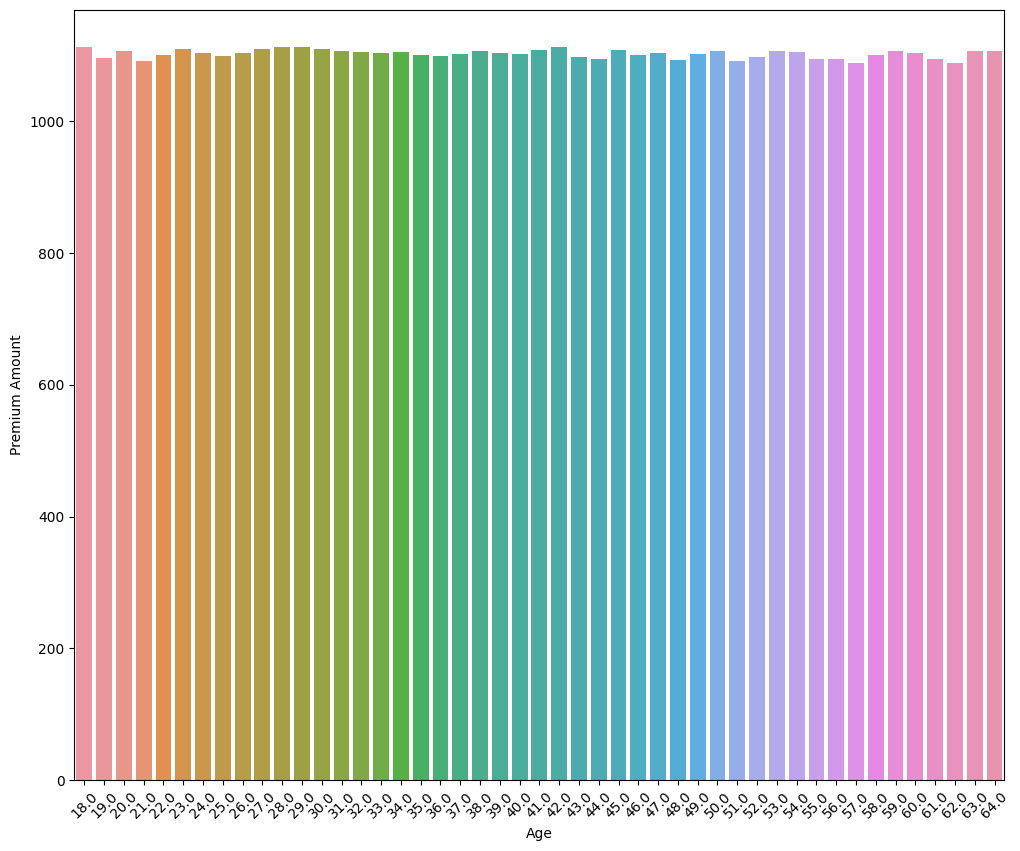

In [100]:
plt.figure(figsize=(12, 10))
data_grouped = data.groupby('Age')['Premium Amount'].mean().reset_index()
sns.barplot(data=data_grouped, y='Premium Amount', x='Age')
plt.xticks(rotation=45);

## Gender vs Premium Amount

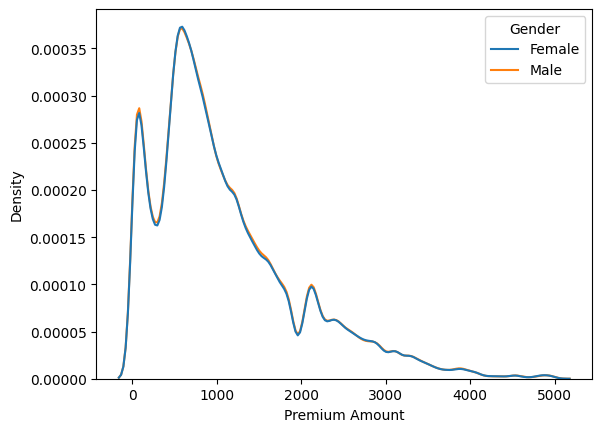

In [101]:
sns.kdeplot(data=data, hue='Gender', x='Premium Amount');

## Annual Income vs Education Level, Premium Amount

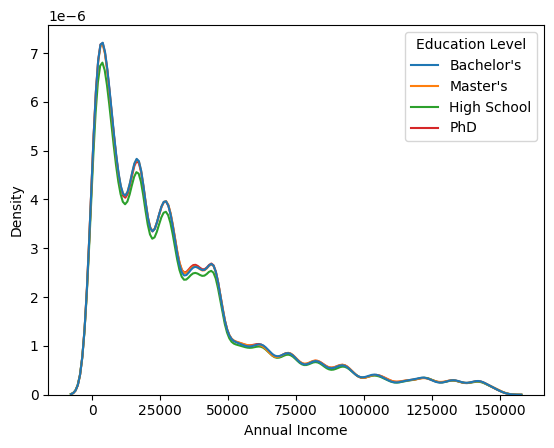

In [102]:
sns.kdeplot(data=data, x='Annual Income', hue='Education Level');

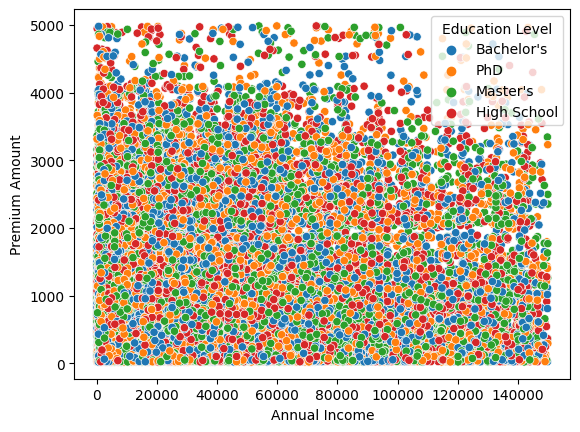

In [103]:
sns.scatterplot(data=data.sample(frac=0.05), x='Annual Income', y='Premium Amount', hue='Education Level');

Not Helpul But Beautiful tho :)

In [104]:
# Since all categories of the Education level and Annual Income looks similar, we can impute with the same data i.e. median
data['Annual Income'].median()

23911.0

## Marital Status vs Premium Amount, Education Level

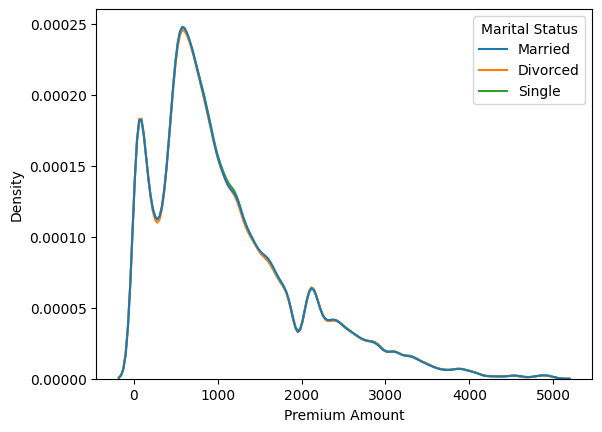

In [105]:
sns.kdeplot(data=data, x='Premium Amount', hue='Marital Status');

## Number of Dependents vs Premium Amount

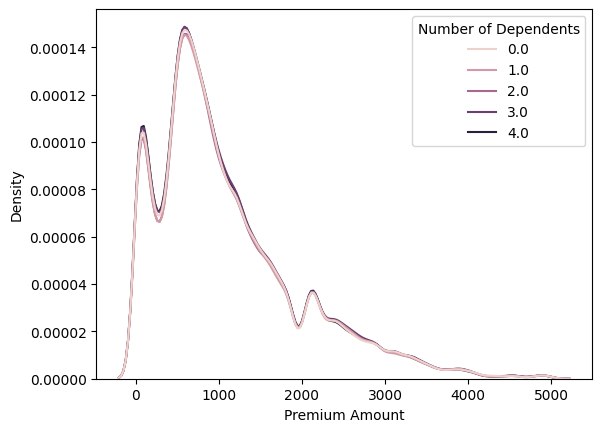

In [106]:
sns.kdeplot(data=data, x='Premium Amount', hue='Number of Dependents');

## Health Score vs Premium Amount, Education level

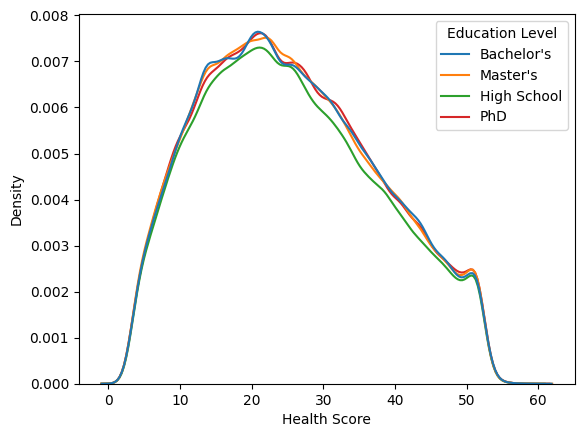

In [107]:
sns.kdeplot(data=data, x='Health Score', hue='Education Level');

In [108]:
data['Health Score'].mean(), data['Health Score'].median()

(25.613907692519252, 24.57864816412784)

## Previous Claims vs Premium Amount, Education level

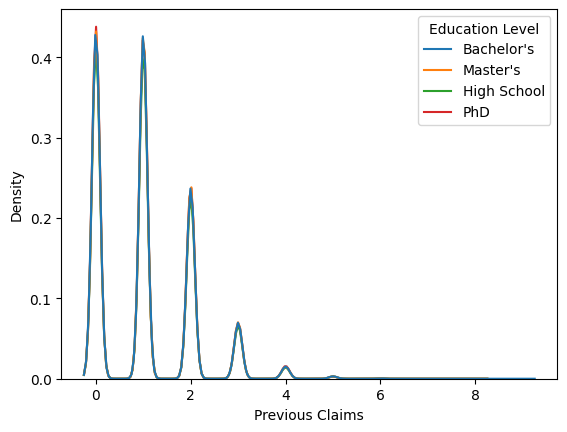

In [109]:
sns.kdeplot(data=data, x='Previous Claims', hue='Education Level');

## Credit Score vs Premium Amount, Education Level

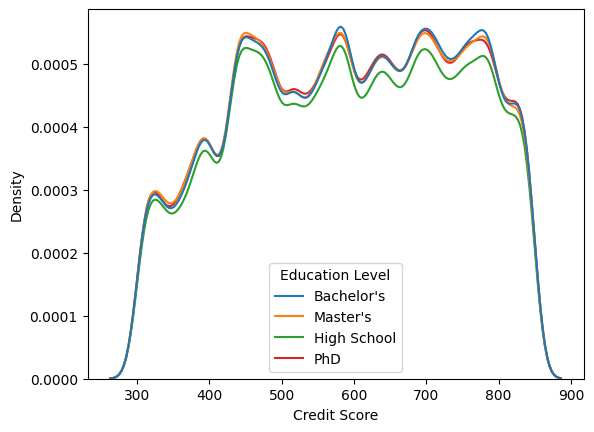

In [110]:
sns.kdeplot(data=data, x='Credit Score', hue='Education Level');

In [111]:
data['Credit Score'].median()

595.0

# Lets take some actions based on our inferences

In [112]:
data.columns

Index(['Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount', 'Year'],
      dtype='object')

In [113]:
data.head()

Age  Gender  Annual Income Marital Status  Number of Dependents  \
id                                                                     
0   19.0  Female        10049.0        Married                   1.0   
1   39.0  Female        31678.0       Divorced                   3.0   
2   23.0    Male        25602.0       Divorced                   3.0   
3   21.0    Male       141855.0        Married                   2.0   
4   21.0    Male        39651.0         Single                   1.0   

   Education Level     Occupation  Health Score  Location    Policy Type  ...  \
id                                                                        ...   
0       Bachelor's  Self-Employed     22.598761     Urban        Premium  ...   
1         Master's            NaN     15.569731     Rural  Comprehensive  ...   
2      High School  Self-Employed     47.177549  Suburban        Premium  ...   
3       Bachelor's            NaN     10.938144     Rural          Basic  ...   
4       Bachelor's  Self-Employed     20.376094     Rural        Premium  ...   

    Vehicle Age  Credit Score  Insurance Duration          Policy Start Date  \
id                                                                             
0          17.0         372.0                 5.0 2023-12-23 15:21:39.134960   
1          12.0         694.0                 2.0 2023-06-12 15:21:39.111551   
2          14.0           NaN                 3.0 2023-09-30 15:21:39.221386   
3           0.0         367.0                 1.0 2024-06-12 15:21:39.226954   
4           8.0         598.0                 4.0 2021-12-01 15:21:39.252145   

   Customer Feedback Smoking Status Exercise Frequency Property Type  \
id                                                                     
0               Poor             No             Weekly         House   
1            Average            Yes            Monthly         House   
2               Good            Yes             Weekly         House   
3               Poor            Yes              Daily     Apartment   
4               Poor            Yes             Weekly         House   

   Premium Amount  Year  
id                       
0          2869.0  2023  
1          1483.0  2023  
2           567.0  2023  
3           765.0  2024  
4          2022.0  2021  

[5 rows x 21 columns]

In [114]:
# **Explanation of this is given in the code step by step**
# 1. Fill NaN of Age with 41 in 1st iter, and its respective categorical modes in 2nd iter.
# 2. Fill NaN of Annual Income with 23911.0 (median).
# 3. Fill NaN Marital Status NaN with 'Unknown'. (Since 18k NaN).
# 4. Fill -1 in NaN of Number of Dependents.
# 5. Fill NaN of Occupation with 'Unknown'.
# 6. Fill NaN of Health Score with median (25).
# 7. Fill NaN of Previous Claims with -1 (Unknown category since NaN is huge), drop in 2nd iter.
# 8. Fill NaN values of Vehicle Age with 10.0 (median).
# 9. Fill NaN values of Credit Score with 595.0 (Median).
# 10. Fill NaN values of Insurance Duration with 5 (median).
# 11. Make year column and Drop Policy Start Date Column.
# 12. Fill NaN values of Customer Feedback column with 'Unknown'

In [115]:
def impute(data):
    data['Age'].fillna(41.0, inplace=True)
    data['Annual Income'].fillna(23911.0, inplace=True)
    data['Marital Status'].fillna('Unknown', inplace=True)
    data['Number of Dependents'].fillna(-1, inplace=True)
    data['Occupation'].fillna('Unknown', inplace=True)
    data['Health Score'].fillna(25.0, inplace=True)
    data['Previous Claims'].fillna(-1, inplace=True)
    data['Vehicle Age'].fillna(10.0, inplace=True)
    data['Credit Score'].fillna(595.0, inplace=True)
    data['Insurance Duration'].fillna(5.0, inplace=True)
    data['Customer Feedback'].fillna('Unknown', inplace=True)
    if 'Policy Start Date' in data.columns:
        data['Policy Start Date'] = pd.to_datetime(data['Policy Start Date'])
        data['Year'] = data['Policy Start Date'].dt.year
        data.drop('Policy Start Date', axis=1, inplace=True)
    print("Done with Imputation!")
    return data

In [139]:
def encode_and_scale(data, le_cols, scale_cols, target_col, test=None, training=True):
    X_train, X_test, y_train, y_test = train_test_split(data.drop(target_col, axis=1),
                                                        data[target_col], 
                                                        random_state=42,
                                                        test_size=0.2)
    if training==True and test is None:
        for col in le_cols:
            le = LabelEncoder()
            X_train[col] = le.fit_transform(X_train[col])
            X_test[col] = le.transform(X_test[col])
            print(f"Done {col}")
        scaler = StandardScaler()
        X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
        X_test[scale_cols] = scaler.transform(X_test[scale_cols])
        return X_train, X_test, y_train, y_test

    if training==False and test is not None:
        for col in le_cols:
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col])
            test[col] = le.transform(test[col])
            print(f"Done {col}")
        scaler = StandardScaler()
        data[scale_cols] = scaler.fit_transform(data[scale_cols])
        test[scale_cols] = scaler.transform(test[scale_cols])
        return data, test

            
    if training==False and test is  None:
        print("Test data is empty!")

In [117]:
le_cols = ['Gender', 'Marital Status', 'Education Level', 'Occupation',
           'Location', 'Policy Type', 'Customer Feedback', 'Smoking Status',
           'Exercise Frequency', 'Property Type']

scale_cols = ['Annual Income', 'Health Score', 'Credit Score']

target_col = 'Premium Amount'

In [118]:
imputed_data = impute(data)

Done with Imputation!


In [119]:
X_train, X_test, y_train, y_test = encode_and_scale(data,
                                                    le_cols,
                                                    scale_cols,
                                                    target_col,
                                                    test=None,
                                                    training=True)

Done Gender
Done Marital Status
Done Education Level
Done Occupation
Done Location
Done Policy Type
Done Customer Feedback
Done Smoking Status
Done Exercise Frequency
Done Property Type


In [120]:
X_train.head()

Age  Gender  Annual Income  Marital Status  Number of Dependents  \
id                                                                          
404339  45.0       1       1.862551               0                   3.0   
748487  51.0       0      -0.858117               1                   1.0   
435951  48.0       0       0.281506               0                   0.0   
311284  43.0       0      -0.064637               0                   0.0   
318790  18.0       1      -0.617436               1                  -1.0   

        Education Level  Occupation  Health Score  Location  Policy Type  \
id                                                                         
404339                0           3      1.551719         2            1   
748487                3           3      1.376423         0            0   
435951                2           3      2.213377         2            1   
311284                3           2     -0.415510         2            1   
318790                0           3      0.965462         2            0   

        Previous Claims  Vehicle Age  Credit Score  Insurance Duration  \
id                                                                       
404339             -1.0          1.0     -2.000439                 2.0   
748487             -1.0          1.0      0.289059                 8.0   
435951              1.0         12.0      1.175088                 9.0   
311284              2.0          8.0     -0.944293                 1.0   
318790             -1.0         18.0      1.685440                 3.0   

        Customer Feedback  Smoking Status  Exercise Frequency  Property Type  \
id                                                                             
404339                  2               0                   2              2   
748487                  2               1                   1              1   
435951                  2               1                   2              1   
311284                  0               0                   1              1   
318790                  2               1                   1              0   

        Year  
id            
404339  2024  
748487  2020  
435951  2021  
311284  2022  
318790  2021

In [121]:
X_test.head()

Age  Gender  Annual Income  Marital Status  Number of Dependents  \
id                                                                           
372605   52.0       0      -0.849958               1                  -1.0   
551204   60.0       0       0.230688               1                   4.0   
240320   58.0       0      -0.950329               1                   2.0   
1047361  39.0       1      -0.737507               0                   0.0   
555362   47.0       1       0.340672               0                  -1.0   

         Education Level  Occupation  Health Score  Location  Policy Type  \
id                                                                          
372605                 2           0     -1.478928         0            0   
551204                 0           0     -0.049027         1            1   
240320                 0           3      0.750419         2            1   
1047361                0           3      0.055987         0            0   
555362                 3           3      0.094068         1            1   

         Previous Claims  Vehicle Age  Credit Score  Insurance Duration  \
id                                                                        
372605               0.0         18.0     -0.682028                 3.0   
551204               0.0          3.0     -1.794880                 3.0   
240320               2.0         19.0      0.012618                 7.0   
1047361              1.0         17.0      1.189264                 5.0   
555362               1.0          4.0     -1.943733                 4.0   

         Customer Feedback  Smoking Status  Exercise Frequency  Property Type  \
id                                                                              
372605                   0               0                   3              0   
551204                   2               0                   3              0   
240320                   2               0                   1              2   
1047361                  2               1                   2              1   
555362                   2               1                   3              0   

         Year  
id             
372605   2020  
551204   2020  
240320   2021  
1047361  2022  
555362   2020

In [122]:
y_train[:5], y_test[:5]

(id
 404339    2386.0
 748487     285.0
 435951     654.0
 311284    1095.0
 318790    1334.0
 Name: Premium Amount, dtype: float64,
 id
 372605     2742.0
 551204     1347.0
 240320     2196.0
 1047361     684.0
 555362     1714.0
 Name: Premium Amount, dtype: float64)

# Modelling Baselines

In [123]:
models = {
    'Linear Regression': LinearRegression(n_jobs=-1),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'XGBoost': XGBRegressor(verbosity=0, n_jobs=-1),
    'LightGBM': LGBMRegressor(verbosity=-1, n_jobs=-1),
    'CatBoost': CatBoostRegressor(verbose=0),
    # 'Gradient Boosting': GradientBoostingRegressor(),
    # 'Support Vector Regressor': SVR(),
    # 'KNN Regressor': KNeighborsRegressor(n_jobs=-1),
    # 'Random Forest': RandomForestRegressor(n_jobs=-1),
}

In [124]:
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    # Clip negative predictions (RMSLE requires non-negative values)
    y_pred = np.maximum(y_pred, 0)
    
    # Calculate RMSLE
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
    
    # Store results
    results[name] = {'RMSLE': rmsle}
    
    # Print results for the current model
    print(f"{name}: RMSLE = {rmsle:.4f}")

Training Linear Regression...
Linear Regression: RMSLE = 1.1684
Training Ridge Regression...
Ridge Regression: RMSLE = 1.1684
Training Lasso Regression...
Lasso Regression: RMSLE = 1.1685
Training Decision Tree...
Decision Tree: RMSLE = 1.5100
Training XGBoost...
XGBoost: RMSLE = 1.1376
Training LightGBM...
LightGBM: RMSLE = 1.1346
Training CatBoost...
CatBoost: RMSLE = 1.1361


# Test Set 

In [140]:
data = pd.read_csv('/kaggle/input/playground-series-s4e12/train.csv', index_col='id')
test_data = pd.read_csv('/kaggle/input/playground-series-s4e12/test.csv', index_col='id')
test_data.head()

Age  Gender  Annual Income Marital Status  Number of Dependents  \
id                                                                          
1200000  28.0  Female         2310.0            NaN                   4.0   
1200001  31.0  Female       126031.0        Married                   2.0   
1200002  47.0  Female        17092.0       Divorced                   0.0   
1200003  28.0  Female        30424.0       Divorced                   3.0   
1200004  24.0    Male        10863.0       Divorced                   2.0   

        Education Level     Occupation  Health Score  Location    Policy Type  \
id                                                                              
1200000      Bachelor's  Self-Employed      7.657981     Rural          Basic   
1200001        Master's  Self-Employed     13.381379  Suburban        Premium   
1200002             PhD     Unemployed     24.354527     Urban  Comprehensive   
1200003             PhD  Self-Employed      5.136225  Suburban  Comprehensive   
1200004     High School     Unemployed     11.844155  Suburban        Premium   

         Previous Claims  Vehicle Age  Credit Score  Insurance Duration  \
id                                                                        
1200000              NaN         19.0           NaN                 1.0   
1200001              NaN         14.0         372.0                 8.0   
1200002              NaN         16.0         819.0                 9.0   
1200003              1.0          3.0         770.0                 5.0   
1200004              NaN         14.0         755.0                 7.0   

                  Policy Start Date Customer Feedback Smoking Status  \
id                                                                     
1200000  2023-06-04 15:21:39.245086              Poor            Yes   
1200001  2024-04-22 15:21:39.224915              Good            Yes   
1200002  2023-04-05 15:21:39.134960           Average            Yes   
1200003  2023-10-25 15:21:39.134960              Poor            Yes   
1200004  2021-11-26 15:21:39.259788           Average             No   

        Exercise Frequency Property Type  
id                                        
1200000             Weekly         House  
1200001             Rarely     Apartment  
1200002            Monthly         Condo  
1200003              Daily         House  
1200004             Weekly         House

In [141]:
data = impute(data)
test_data = impute(test_data)

Done with Imputation!
Done with Imputation!


In [142]:
data, test_data = encode_and_scale( data,
                                    le_cols,
                                    scale_cols,
                                    target_col,
                                    test=test_data,
                                    training=False,)

Done Gender
Done Marital Status
Done Education Level
Done Occupation
Done Location
Done Policy Type
Done Customer Feedback
Done Smoking Status
Done Exercise Frequency
Done Property Type


In [143]:
test_data.head()

Age  Gender  Annual Income  Marital Status  Number of Dependents  \
id                                                                           
1200000  28.0       0      -0.952198               3                   4.0   
1200001  31.0       0       2.961093               1                   2.0   
1200002  47.0       0      -0.484644               0                   0.0   
1200003  28.0       0      -0.062953               0                   3.0   
1200004  24.0       1      -0.681667               0                   2.0   

         Education Level  Occupation  Health Score  Location  Policy Type  \
id                                                                          
1200000                0           1     -1.515687         0            0   
1200001                2           1     -1.031545         1            2   
1200002                3           2     -0.103325         2            1   
1200003                3           1     -1.729003         1            1   
1200004                1           2     -1.161578         1            2   

         Previous Claims  Vehicle Age  Credit Score  Insurance Duration  \
id                                                                        
1200000             -1.0         19.0      0.013020                 1.0   
1200001             -1.0         14.0     -1.567375                 8.0   
1200002             -1.0         16.0      1.600501                 9.0   
1200003              1.0          3.0      1.253240                 5.0   
1200004             -1.0         14.0      1.146935                 7.0   

         Customer Feedback  Smoking Status  Exercise Frequency  Property Type  \
id                                                                              
1200000                  2               1                   3              2   
1200001                  1               1                   2              0   
1200002                  0               1                   1              1   
1200003                  2               1                   0              2   
1200004                  0               0                   3              2   

         Year  
id             
1200000  2023  
1200001  2024  
1200002  2023  
1200003  2023  
1200004  2021

In [144]:
data.head()

Age  Gender  Annual Income  Marital Status  Number of Dependents  \
id                                                                      
0   19.0       0      -0.707414               1                   1.0   
1   39.0       0      -0.023289               0                   3.0   
2   23.0       1      -0.215473               0                   3.0   
3   21.0       1       3.461605               1                   2.0   
4   21.0       1       0.228896               2                   1.0   

    Education Level  Occupation  Health Score  Location  Policy Type  \
id                                                                     
0                 0           1     -0.251846         2            2   
1                 2           3     -0.846432         0            1   
2                 1           1      1.827275         1            2   
3                 0           3     -1.238218         0            0   
4                 0           1     -0.439861         0            2   

    Previous Claims  Vehicle Age  Credit Score  Insurance Duration  \
id                                                                   
0               2.0         17.0     -1.567375                 5.0   
1               1.0         12.0      0.714630                 2.0   
2               1.0         14.0      0.013020                 3.0   
3               1.0          0.0     -1.602810                 1.0   
4               0.0          8.0      0.034281                 4.0   

    Customer Feedback  Smoking Status  Exercise Frequency  Property Type  \
id                                                                         
0                   2               0                   3              2   
1                   0               1                   1              2   
2                   1               1                   3              2   
3                   2               1                   0              0   
4                   2               1                   3              2   

    Premium Amount  Year  
id                        
0           2869.0  2023  
1           1483.0  2023  
2            567.0  2023  
3            765.0  2024  
4           2022.0  2021

# Baseline LightGBM

In [145]:
model = LGBMRegressor(verbosity=-1, n_jobs=-1)

In [146]:
model.fit(data.drop(target_col, axis=1), data[target_col])

LGBMRegressor(n_jobs=-1, verbosity=-1)

In [147]:
y_pred = model.predict(test_data)
y_pred = np.maximum(y_pred, 0)

# Submission file

In [149]:
sub = pd.read_csv('/kaggle/input/playground-series-s4e12/sample_submission.csv')
sub['Premium Amount'] = y_pred
sub.to_csv("Submission_lgb_baseline.csv", index=False)
sub.head()

id  Premium Amount
0  1200000     1304.056790
1  1200001     1113.473595
2  1200002     1078.530236
3  1200003     1092.546349
4  1200004     1032.479856

# Please UPVOTE!!